In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
loan=pd.read_csv("/content/Loan Prediction.csv")

# Problem statement

  A Company wants to automate the loan eligibility process based on customer details provided while filling online        application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others.

# Exploring the features

In [7]:
# Loan_ID : Unique Loan ID
# Gender : Male/ Female
# Married : Applicant married(Y/N)
# Dependents : Number of Dependents
# Education : Applicant Education (Graduate/Under Graduate)
# Self_Employed : Self employed (Y/N)
# ApplicantIncome : Applicant income
# CoapplicantIncome : Coapplicant income
# LoanAmount : Loan amount in thousands of dollars
# Loan_Amount_Term : Term of loan in months
# Credit_History : Credit history meets guidlines (yes/no)
# Property_Area : Urban/ Semi Urban/ Rural
# Loan_Status : Loan approved (Y/N) this is the target variable

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             946 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          980 non-null    object 
 5   Self_Employed      921 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         953 non-null    float64
 9   Loan_Amount_Term   955 non-null    float64
 10  Credit_History     898 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [9]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,953.000000,955.000000,898.000000
mean,5179.795107,1601.916330,142.409234,342.090052,0.836303
std,5695.104533,2718.772806,77.397862,65.289649,0.370207
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,NaN,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

<Axes: >

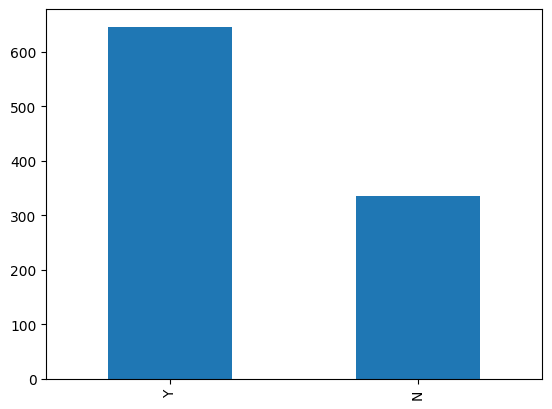

In [12]:
loan.Loan_Status.value_counts().plot(kind="bar")

<Axes: ylabel='Education'>

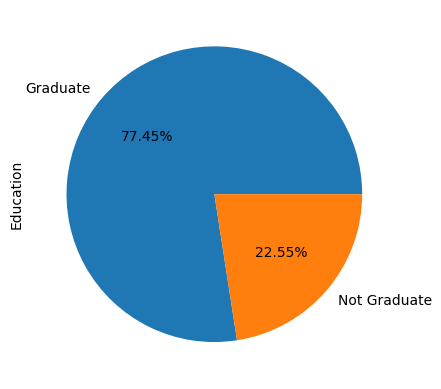

In [13]:
loan.Education.value_counts().plot(kind="pie",autopct="%.2f%%")
# from pie we can analyze that percentage of Graduate is high

<Axes: xlabel='Self_Employed', ylabel='count'>

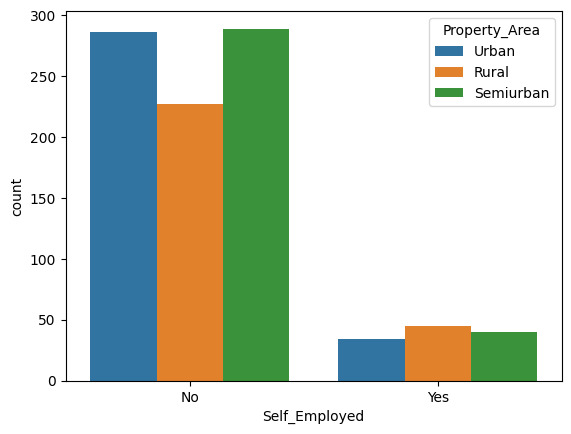

In [14]:
sns.countplot(x="Self_Employed",hue="Property_Area",data=loan)

<Axes: xlabel='Gender', ylabel='count'>

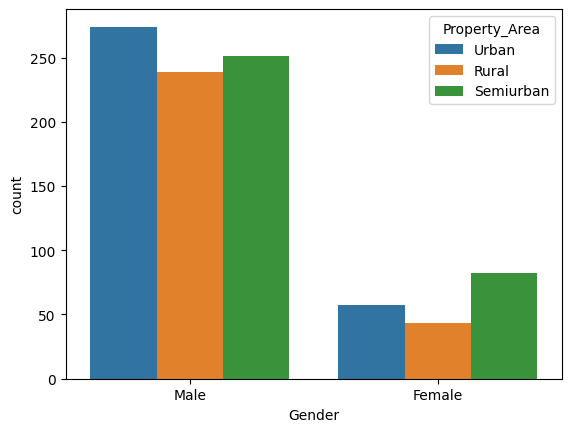

In [15]:
sns.countplot(x="Gender",hue="Property_Area",data=loan)
# Here from the countplot we can analyze that most the Males from Urban are willing for loan

<Axes: >

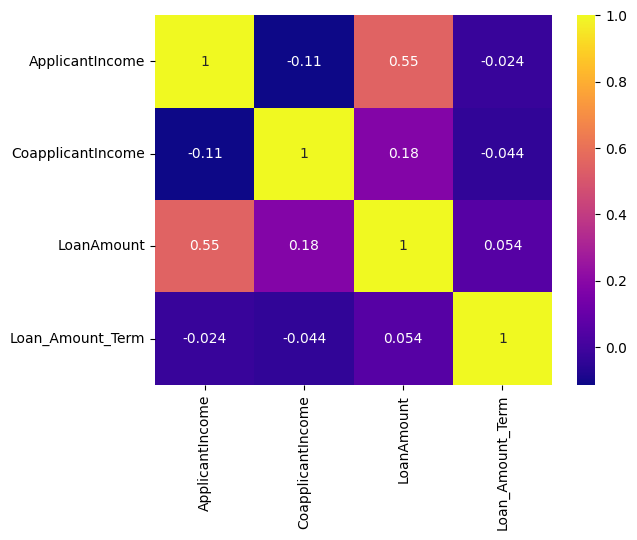

In [16]:
sns.heatmap(loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']].corr(),annot=True,cmap="plasma")

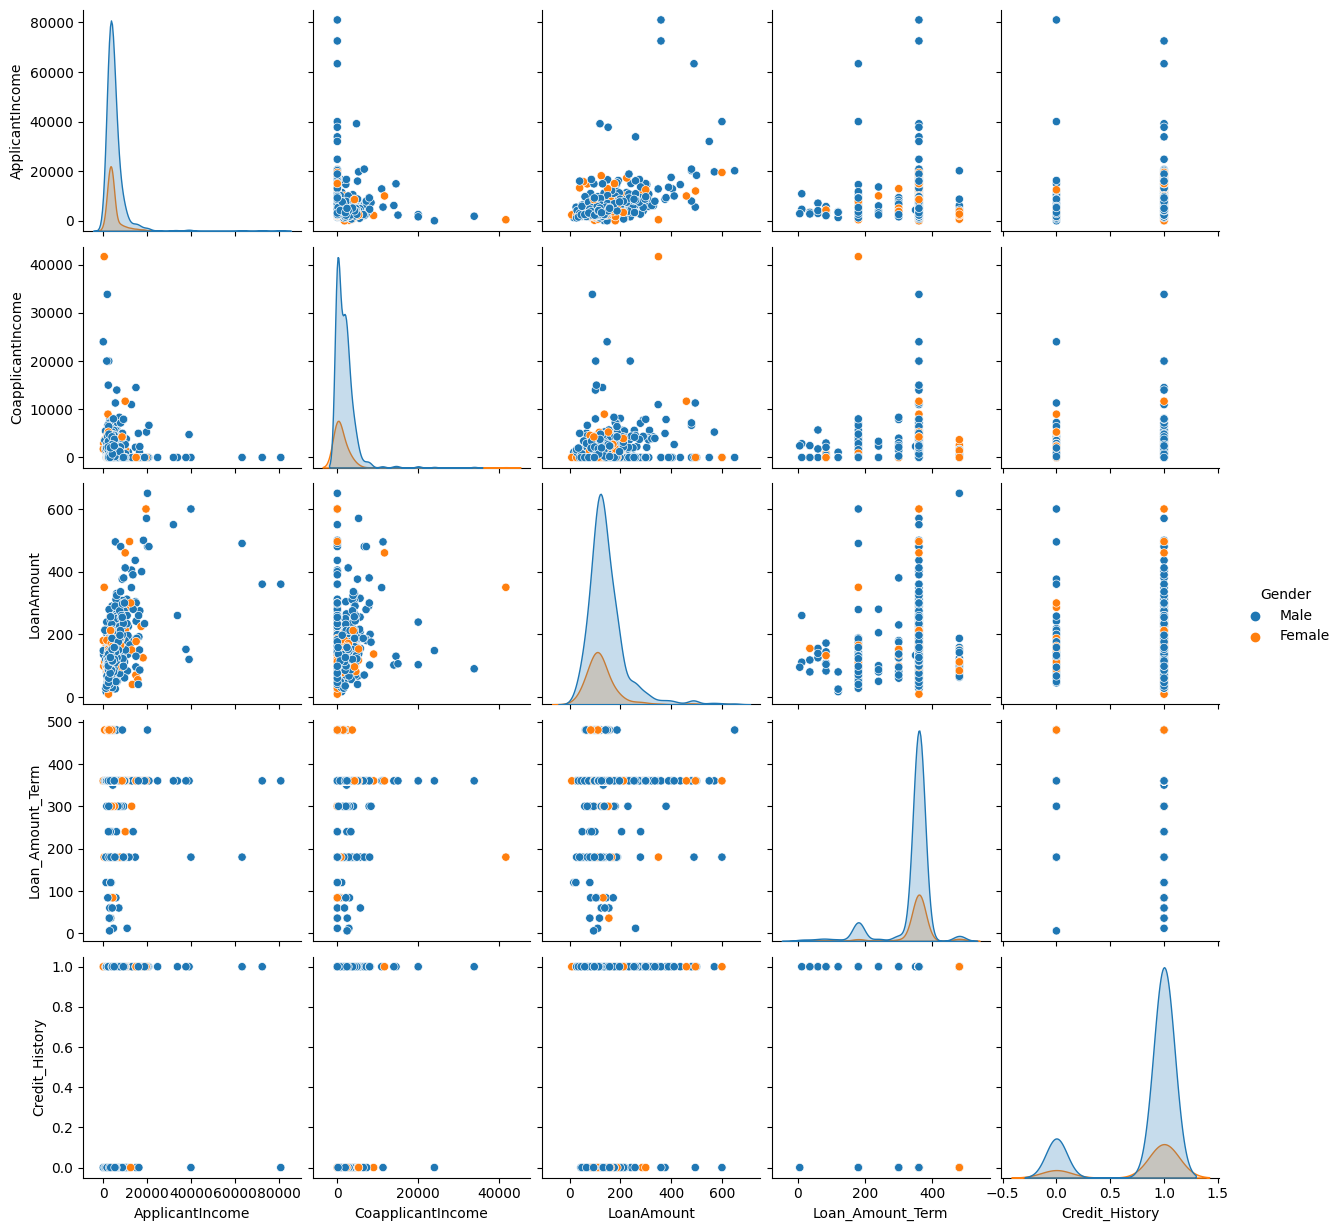

In [17]:
sns.pairplot(loan,hue="Gender")

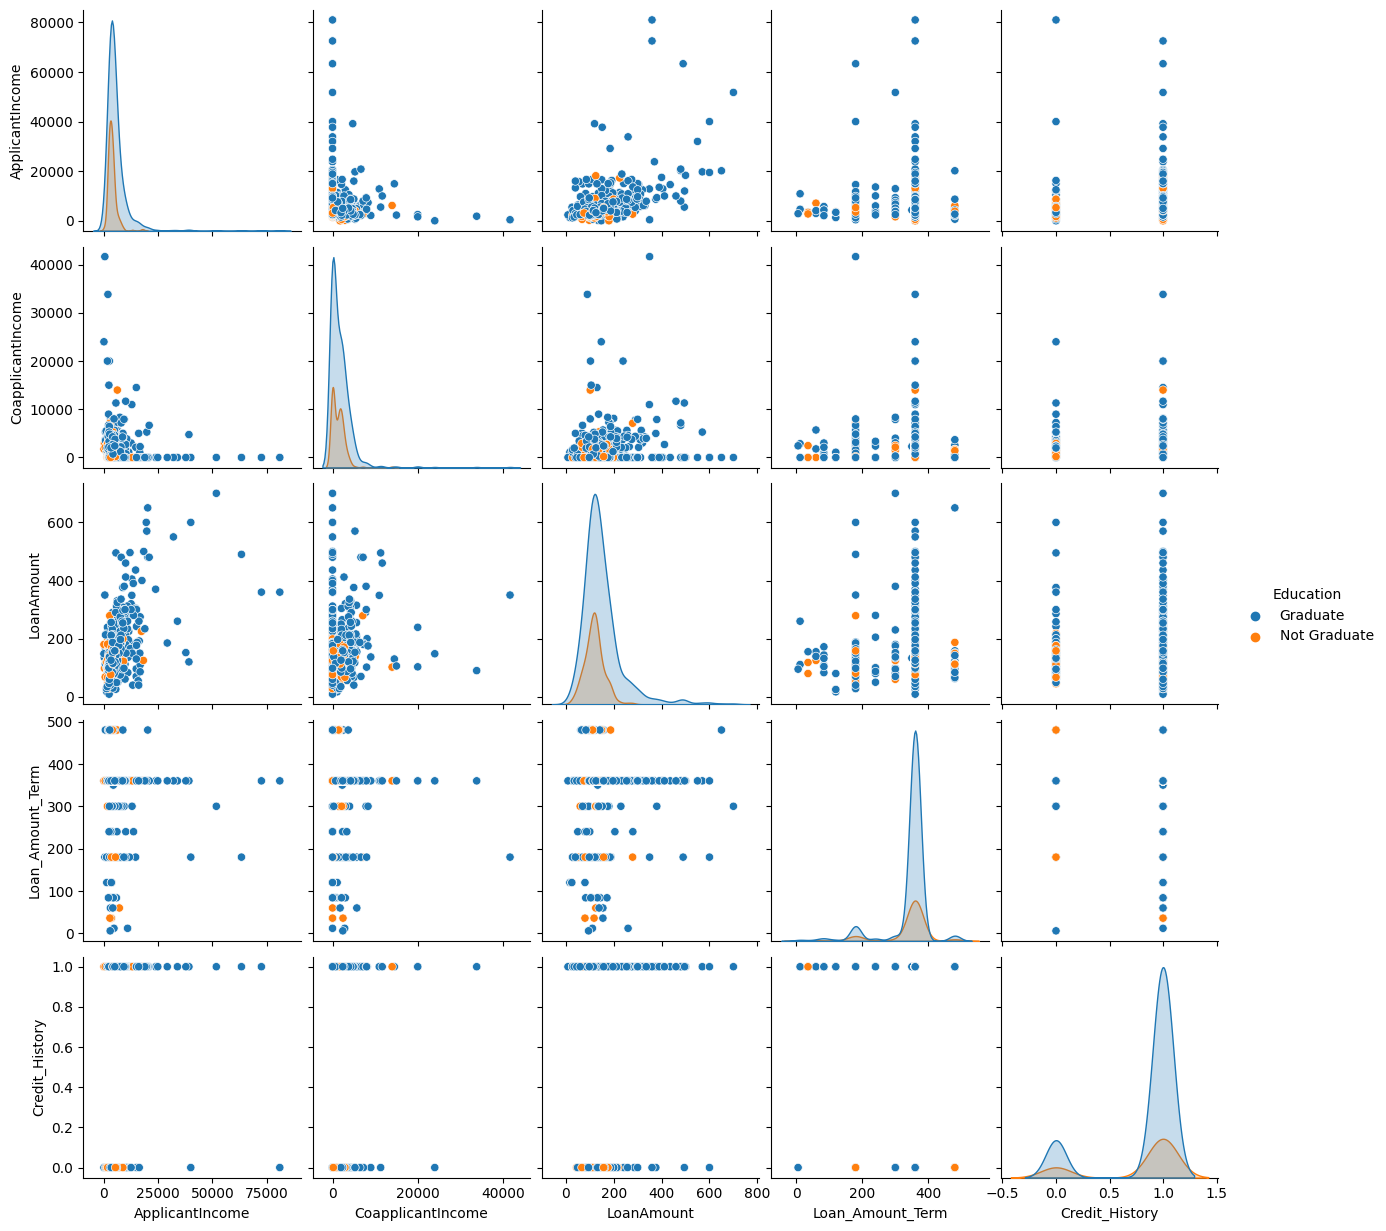

In [18]:
sns.pairplot(loan,hue="Education")

# Data Preprocessing

In [19]:
loan.isnull().sum()

Loan_ID               0
Gender               35
Married               3
Dependents           25
Education             1
Self_Employed        60
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           28
Loan_Amount_Term     26
Credit_History       83
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
loan.isnull().sum()*100 / len(loan)

Loan_ID              0.000000
Gender               3.567788
Married              0.305810
Dependents           2.548420
Education            0.101937
Self_Employed        6.116208
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           2.854230
Loan_Amount_Term     2.650357
Credit_History       8.460754
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [21]:
loan=loan.drop("Loan_ID",axis=1)

In [22]:
loan.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [23]:
loan.Dependents=loan.Dependents.str.replace("+","")

In [24]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
for col in ["Self_Employed","Credit_History"] :
    loan[col]=loan[col].fillna(loan[col].mode()[0])

In [26]:
loan.dropna(inplace=True)
 # Nulls in remaining columns are less than 5% so we are dropping those values

In [27]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Hypothesis Testing

In [28]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [29]:
loan[["ApplicantIncome","CoapplicantIncome"]].corr()

,ApplicantIncome,CoapplicantIncome
ApplicantIncome,1.000000,-0.102654
CoapplicantIncome,-0.102654,1.000000


from matplotlib import pyplot as plt
_df_0['ApplicantIncome'].plot(kind='hist', bins=20, title='ApplicantIncome')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CoapplicantIncome'].plot(kind='hist', bins=20, title='CoapplicantIncome')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='ApplicantIncome', y='CoapplicantIncome', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CoapplicantIncome']
  ys = series['ApplicantIncome']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('CoapplicantIncome', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CoapplicantIncome')
_ = plt.ylabel('ApplicantIncome')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CoapplicantIncome']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CoapplicantIncome'}, axis=1)
              .sort_values('CoapplicantIncome', ascending=True))
  xs = counted['CoapplicantIncome']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('CoapplicantIncome', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CoapplicantIncome')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['ApplicantIncome'].plot(kind='line', figsize=(8, 4), title='ApplicantIncome')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['CoapplicantIncome'].plot(kind='line', figsize=(8, 4), title='CoapplicantIncome')
plt.gca().spines[['top', 'right']].set_visible(False)

In [30]:
np.round(loan.ApplicantIncome.groupby(loan.Loan_Status).mean(),2)

Loan_Status
N    5522.50
Y    4875.64
Name: ApplicantIncome, dtype: float64

In [31]:
# since exactly 2 levels/groups - 2 sample Independent T Test

In [32]:
# Split Data into auto and manual
N = loan[loan.Loan_Status=='N']
Y = loan[loan.Loan_Status=='Y']

In [33]:
ttest_ind(N.ApplicantIncome,Y.ApplicantIncome,equal_var=False)
# # Since pvalue= 0.16896863841799373 is greater than 0.05,Fail to Reject Null
# Difference in Means is  not statistically Significant

TtestResult(statistic=1.3780686639872965, pvalue=0.16896863841799373, df=391.77032353598366)

In [34]:
np.round(loan.LoanAmount.groupby(loan.Loan_Status).mean(),2)

Loan_Status
N    144.51
Y    140.72
Name: LoanAmount, dtype: float64

In [35]:
ttest_ind(N.LoanAmount,Y.LoanAmount,equal_var=False)
# Since pvalue=0.5022046969374202 is greater than 0.05,Fail to Reject Null

TtestResult(statistic=0.6714874651446909, pvalue=0.5022046969374202, df=526.232790678737)

In [36]:
loan["Property_Area"].unique()
# More than 2 levels - Annova Single Factor

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [37]:
Rural=loan[loan.Property_Area=="Rural"]
Urban=loan[loan.Property_Area=="Urban"]
Semiurban=loan[loan.Property_Area=="Semiurban"]

In [38]:
f_oneway(Rural.ApplicantIncome,Urban.ApplicantIncome,Semiurban.ApplicantIncome)

F_onewayResult(statistic=0.07718423789160055, pvalue=0.9257256235466662)

In [39]:
# Both variables categorical - chi Square Test of Independence
# Input of ChiSquare Test is Cross Tabulation. Cross Tabulation is frequency table of 2 Non Numeric Categorical Variables

In [40]:
# Test Null No Association between Gender and Married
pd.crosstab(loan.Gender,loan.Married)

Married,No,Yes
Gender,,
Female,114,55
Male,194,510


In [41]:
chi2_contingency(pd.crosstab(loan.Gender,loan.Married))

Chi2ContingencyResult(statistic=93.27608545089542, pvalue=4.548549702252759e-22, dof=1, expected_freq=array([[ 59.62428408, 109.37571592],
       [248.37571592, 455.62428408]]))

In [42]:
chi2_contingency(pd.crosstab(loan.Education,loan.Loan_Status))

Chi2ContingencyResult(statistic=0.1786146652828685, pvalue=0.6725664881746767, dof=1, expected_freq=array([[221.0836197, 460.9163803],
       [ 61.9163803, 129.0836197]]))

In [43]:
chi2_contingency(pd.crosstab(loan.Property_Area,loan.Loan_Status))

Chi2ContingencyResult(statistic=5.12049786358532, pvalue=0.07728549923065423, dof=2, expected_freq=array([[ 85.25658648, 177.74341352],
       [100.49255441, 209.50744559],
       [ 97.25085911, 202.74914089]]))

# Encoding

In [44]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
976,Male,Yes,3,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,N
978,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,Y
979,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


In [45]:
label=LabelEncoder() # For Dependent column LabelEncoder is used

In [46]:
loan["Loan_Status"]=label.fit_transform(loan["Loan_Status"])

In [47]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
976,Male,Yes,3,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,1
977,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,0
978,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,1
979,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,0


In [48]:
loan=pd.get_dummies(loan,drop_first=True)

In [49]:
loan

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,4009,1777.0,113.0,360.0,1.0,1,1,1,0,0,1,1,1,0,1
977,4158,709.0,115.0,360.0,1.0,0,1,1,0,0,0,0,0,0,1
978,3250,1993.0,126.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0
979,5000,2393.0,158.0,360.0,1.0,0,1,1,0,0,0,0,0,0,0


# Checking Imbalance

In [50]:
loan['Loan_Status'].value_counts()

1    590
0    283
Name: Loan_Status, dtype: int64

In [51]:
X=loan.drop('Loan_Status',axis=1)
y=loan.Loan_Status

In [52]:
X_sm,Y_sm=SMOTE().fit_resample(X,y)

<Axes: >

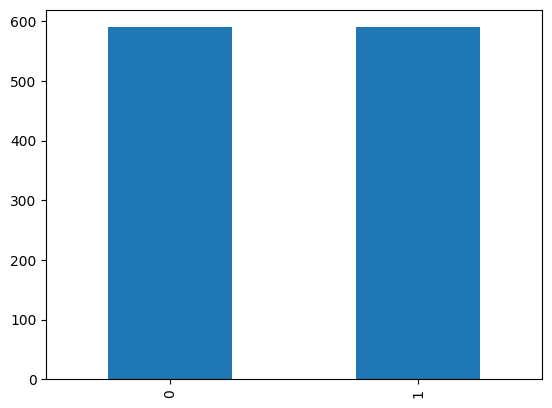

In [53]:
Y_sm.value_counts().plot(kind='bar')

In [54]:
Y_sm.value_counts()

0    590
1    590
Name: Loan_Status, dtype: int64

# Division of Data into training and testing set

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X_sm,Y_sm,test_size=0.20,random_state=120)

# Model Building

### Model1 : Logistic Regression

In [63]:
lr_model= LogisticRegression().fit(X_train,Y_train)
lr_tr_pred= lr_model.predict(X_train)
lr_te_pred = lr_model.predict(X_test)
lr_tr_acc = round(accuracy_score(Y_train,lr_tr_pred),4)
lr_te_acc = round(accuracy_score(Y_test,lr_te_pred),4)
print("Training Accuracy : ",round(lr_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing Accuracy : ",round(lr_te_acc*100,2),"%")
print("*****************************************************")
print("Classification report of X_test : \n",(classification_report(Y_test,lr_te_pred)))

Training Accuracy :  71.19 %
*****************************************************
Testing Accuracy :  68.64 %
*****************************************************
Classification report of X_test : 
               precision    recall  f1-score   support

           0       0.69      0.66      0.68       117
           1       0.68      0.71      0.70       119

    accuracy                           0.69       236
   macro avg       0.69      0.69      0.69       236
weighted avg       0.69      0.69      0.69       236



### Model2 : DecisionTree Classification

In [65]:
dt_model= DecisionTreeClassifier().fit(X_train,Y_train)
dt_tr_pred= dt_model.predict(X_train)
dt_te_pred = dt_model.predict(X_test)
dt_tr_acc = round(accuracy_score(Y_train,dt_tr_pred),4)
dt_te_acc = round(accuracy_score(Y_test,dt_te_pred),4)
print("Training Accuracy : ",round(dt_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing Accuracy : ",round(dt_te_acc*100,2),"%")
print("*****************************************************")
print("Classification report of X_test : \n",(classification_report(Y_test,dt_te_pred)))

Training Accuracy :  100.0 %
*****************************************************
Testing Accuracy :  71.61 %
*****************************************************
Classification report of X_test : 
               precision    recall  f1-score   support

           0       0.71      0.72      0.71       117
           1       0.72      0.71      0.72       119

    accuracy                           0.72       236
   macro avg       0.72      0.72      0.72       236
weighted avg       0.72      0.72      0.72       236



### Model3 : RandomForest Classification

In [66]:
rfc_model= RandomForestClassifier().fit(X_train,Y_train)
rfc_tr_pred= rfc_model.predict(X_train)
rfc_te_pred = rfc_model.predict(X_test)
rfc_tr_acc = round(accuracy_score(Y_train,rfc_tr_pred),4)
rfc_te_acc = round(accuracy_score(Y_test,rfc_te_pred),4)
print("Training Accuracy : ",round(rfc_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing Accuracy : ",round(rfc_te_acc*100,2),"%")
print("*****************************************************")
print("Classification report of X_test : \n",(classification_report(Y_test,rfc_te_pred)))

Training Accuracy :  100.0 %
*****************************************************
Testing Accuracy :  74.15 %
*****************************************************
Classification report of X_test : 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       117
           1       0.73      0.77      0.75       119

    accuracy                           0.74       236
   macro avg       0.74      0.74      0.74       236
weighted avg       0.74      0.74      0.74       236



### Model 4 : GradientBoosting Classification

In [67]:
gb_model= GradientBoostingClassifier().fit(X_train,Y_train)
gb_tr_pred= gb_model.predict(X_train)
gb_te_pred = gb_model.predict(X_test)
gb_tr_acc = round(accuracy_score(Y_train,gb_tr_pred),4)
gb_te_acc = round(accuracy_score(Y_test,gb_te_pred),4)
print("Training Accuracy : ",round(gb_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing Accuracy : ",round(gb_te_acc*100,2),"%")
print("*****************************************************")
print("Classification report of X_test : \n",(classification_report(Y_test,gb_te_pred)))

Training Accuracy :  85.49 %
*****************************************************
Testing Accuracy :  69.92 %
*****************************************************
Classification report of X_test : 
               precision    recall  f1-score   support

           0       0.71      0.66      0.68       117
           1       0.69      0.74      0.71       119

    accuracy                           0.70       236
   macro avg       0.70      0.70      0.70       236
weighted avg       0.70      0.70      0.70       236



### Model 5 : KNN Classifier

In [68]:
kn_model= KNeighborsClassifier().fit(X_train,Y_train)
kn_tr_pred= kn_model.predict(X_train)
kn_te_pred = kn_model.predict(X_test)
kn_tr_acc = round(accuracy_score(Y_train,kn_tr_pred),4)
kn_te_acc = round(accuracy_score(Y_test,kn_te_pred),4)
print("Training Accuracy : ",round(kn_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing Accuracy : ",round(kn_te_acc*100,2),"%")
print("*****************************************************")
print("Classification report of X_test : \n",(classification_report(Y_test,kn_te_pred)))

Training Accuracy :  77.75 %
*****************************************************
Testing Accuracy :  64.83 %
*****************************************************
Classification report of X_test : 
               precision    recall  f1-score   support

           0       0.64      0.68      0.66       117
           1       0.66      0.62      0.64       119

    accuracy                           0.65       236
   macro avg       0.65      0.65      0.65       236
weighted avg       0.65      0.65      0.65       236



## Model Comparision

In [69]:
Models = ["Logistic Regression","DecisionTree Classifier","RandomForest Classifier","GradientBoosting Classifier",
          "KNN Classifier"]
Accuracy = [lr_te_acc,dt_te_acc,rfc_te_acc,gb_te_acc,kn_te_acc]

<Axes: >

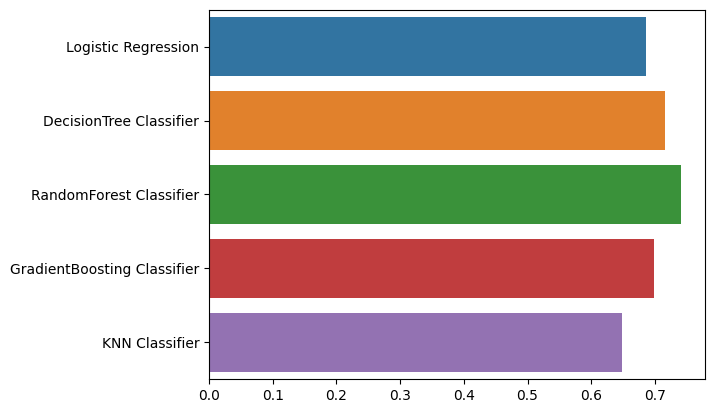

In [70]:
sns.barplot(x=Accuracy,y=Models)

## Randon Forest is considered as final model as per the accuracy

## GridSearchCV using RandomForest Classifier

In [71]:
d={'n_estimators': [1000,1500,2000],
   "criterion":["gini","entropy"],
    "max_depth":[10,11,12]
 }

In [72]:
rfc1=RandomForestClassifier()

In [73]:
gscv=GridSearchCV(rfc1,param_grid=d,cv=10,n_jobs=-1)

In [74]:
gscv.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 11, 12],
                         'n_estimators': [1000, 1500, 2000]})

In [75]:
gscv.cv_results_

{'mean_fit_time': array([2.25794942, 3.6882865 , 4.55455174, 2.30326054, 3.35664673,
        5.56692891, 3.13922548, 3.55475063, 4.67339616, 2.39970529,
        3.50056374, 4.78608768, 2.44032588, 3.7247108 , 4.83948636,
        2.47008867, 3.8568749 , 4.97333026]),
 'std_fit_time': array([0.22198266, 0.42581305, 0.3381271 , 0.21164041, 0.17662569,
        1.49757463, 1.00578917, 0.3285971 , 0.31048563, 0.28427895,
        0.20809137, 0.30489781, 0.2628555 , 0.3124033 , 0.30871941,
        0.23129389, 0.31861366, 0.29636303]),
 'mean_score_time': array([0.0850244 , 0.15155656, 0.17458086, 0.09024887, 0.14138119,
        0.19912832, 0.10773332, 0.12908077, 0.16921766, 0.0877974 ,
        0.12046132, 0.18485937, 0.08051226, 0.12577021, 0.1793268 ,
        0.08595715, 0.12903421, 0.16531861]),
 'std_score_time': array([0.00294408, 0.0657722 , 0.02332786, 0.01295203, 0.03276683,
        0.06477485, 0.04992199, 0.01472303, 0.00710211, 0.01513859,
        0.0175921 , 0.05662469, 0.00509378, 

In [76]:
gscv.best_score_

0.726084117032393

In [77]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 1500}

# Conclusion
      
### From the above algorithms we found that RandomForest Classifier is the best algorithm comparing to other models